# Linear Regression

This is an implementation of the Linear Regression algorithm. The following are the formulas I used to build this model.

Let $n$ and $N$ be the number of features and the number of samples, respectively.

let $b$ and $w$ be the intercept_ and the coef_, respectively

$$\hat y=b+\sum_{i=1}^n w_ix_i$$

We can use this equation to predict at each step of the gradient descent method.

The following equations represent the process of gradient descent, where we minimize the cost that is resulted from all the values of the coefficients. $D_b$ represents the derivative of $b$ and $D_w$ represents the derivative of each $w$.

$$D_b=\frac{1}{N}\sum_{i=1}^n(\hat{y_i}-y_i)$$

,

$$D_w=\frac{1}{N}\sum_{i=1}^n x_i(\hat{y_i}-y_i)$$

Let $l$ be the learning rate of the model. We can update the coefficients (each $w$ and the $b$) with the following formulas:

$$b=b-l\cdot D_b$$

,

$$w=w-l\cdot D_w$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:
  def __init__(self, learning_rate=0.001, max_iter=1000):
    self.intercept_ = None   # when all feature inputs are zero (w0)
    self.coef_ = None   # weights of each feature (w1x1 + w2x2 + ... + wnxn)
    self.learning_rate = learning_rate
    self.max_iter = max_iter
  
  def fit(self, X, y):
    n_samples, n_features = np.shape(X)
    self.intercept_ = 0
    self.coef_ = np.zeros(n_features)

    for _ in range(self.max_iter):
      y_pred = self.predict(X)

      D_intercept_ = (1/n_samples)*np.sum(y_pred-y)
      D_coef_ = (1/n_samples)*np.dot(X.T, (y_pred-y))

      self.intercept_ -= D_intercept_*self.learning_rate
      self.coef_ -= D_coef_*self.learning_rate
      #print(self.coef_)
  
  def predict(self, X):
    return self.intercept_ + np.dot(X, self.coef_)

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=5, noise=5, random_state=4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression(learning_rate=0.1)
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 186.08603918  187.27734983]
 [  24.98096795   29.85621378]
 [  40.07182988   35.14514595]
 [-132.48506004 -138.01397276]
 [  51.68075693   55.54119898]
 [ 243.75947964  244.94347827]
 [-103.49930229  -93.33334103]
 [ 112.62060633  112.48943225]
 [ 117.35699105  116.22245432]
 [  40.74733516   39.71833408]
 [ -52.6084413   -45.12815358]
 [ 167.80137102  170.49068565]
 [  87.77598845   89.30402437]
 [  10.6340134    11.06763933]
 [ 130.06229586  129.7591366 ]
 [ -77.29035192  -76.83842471]
 [ 156.25494989  143.54521262]
 [ 148.60126169  148.40557937]
 [-262.2255376  -255.26688887]
 [ 207.99878025  205.63798924]
 [ 182.49341714  184.95126406]
 [-104.0657833   -99.29124343]
 [ -42.55533413  -28.70390192]
 [  -5.70194773   -1.13546058]
 [-103.55253787  -98.31027002]
 [   9.46698879    8.83771199]
 [   1.22534111   -0.54621256]
 [ 135.83420671  134.09183092]
 [ 280.0287718   284.06795791]
 [-162.07895334 -154.2132908 ]
 [-108.93256267 -104.51132883]
 [  34.38944392   38.90139507]
 [-190.9

### Residual Analysis

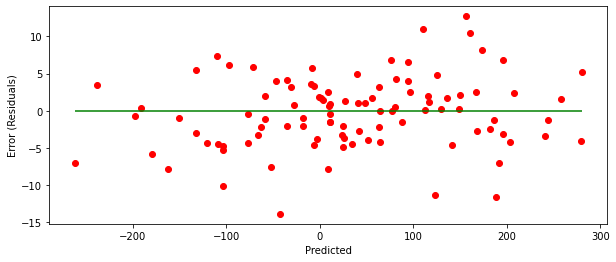

In [ ]:
plt.figure(figsize=(10, 4))
plt.hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred), colors='green')  # zero error
plt.scatter(y_pred, y_pred-y_test, c='red')
plt.xlabel('Predicted')
plt.ylabel('Error (Residuals)')
plt.show()

### MSE (Mean Squared Error)

$$\text{MSE}=\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y_i})^2$$

In [ ]:
def mean_squared_error(y_test, y_pred):
  return sum((y_test-y_pred)**2)/len(y_test)

In [ ]:
mean_squared_error(y_test, y_pred)

23.112019009919507

### $R^2$ (Coefficient of Determination)

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar y)^2}$$

In [ ]:
def r_squared(y_test, y_pred):
  return 1 - sum((y_test-y_pred)**2)/sum((y_test-np.mean(y_test))**2)

In [ ]:
r_squared(y_test, y_pred)

0.9983130872130557